# Suggested targets

In [2]:
import os
import numpy as np
import pandas as pd

data_path = os.path.join("eDo", "data", "processed.csv")
df = pd.read_csv(data_path, parse_dates=['DateTime'])
df.sort_values("DateTime", inplace=True)

df["Return"] = df["Close"].pct_change()
df["Return_next_10"] = (df["Close"].shift(-10) - df["Close"]) / df["Close"]
df.dropna(subset=["Return", "Return_next_10", "fracdiff"], inplace=True)

df["ReturnBin"] = pd.cut(
    df["Return"],
    bins=[-np.inf, -0.05, -0.02, 0.02, 0.05, np.inf],
    labels=[0, 1, 2, 3, 4]
).astype(int)

df["ReturnBin10"] = pd.cut(
    df["Return_next_10"],
    bins=[-np.inf, -0.05, -0.02, 0.02, 0.05, np.inf],
    labels=[0, 1, 2, 3, 4]
).astype(int)

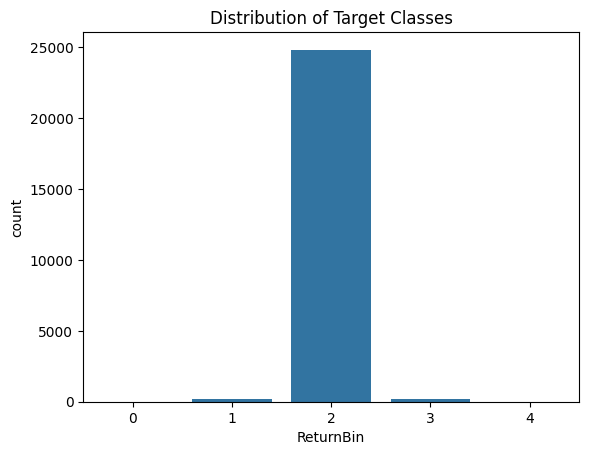

ReturnBin
2    24822
1      167
3      162
0        5
4        5
Name: count, dtype: int64


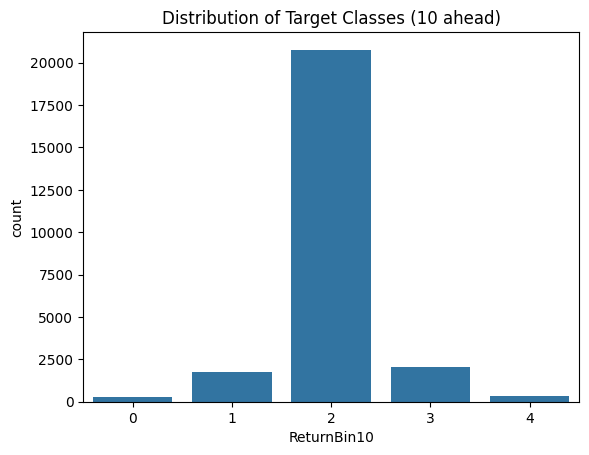

ReturnBin10
2    20768
3     2029
1     1738
4      339
0      287
Name: count, dtype: int64


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['ReturnBin'])  # or y_train if you already split
plt.title("Distribution of Target Classes")
plt.show()

print(df['ReturnBin'].value_counts())

sns.countplot(x=df['ReturnBin10'])  # or y_train if you already split
plt.title("Distribution of Target Classes (10 ahead)")
plt.show()

print(df['ReturnBin10'].value_counts())


Text(0, 0.5, 'Frequency')

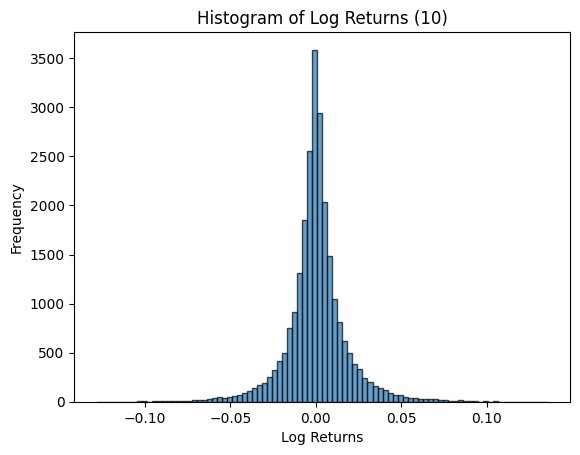

In [4]:
plt.hist(df['Return_next_10'], bins=90, edgecolor='k', alpha=0.7)
plt.title('Histogram of Log Returns (10)')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')

# Quantile targets

-0.899540794825509 -0.19265939276745525 0.23280489576765825 0.990126421073035


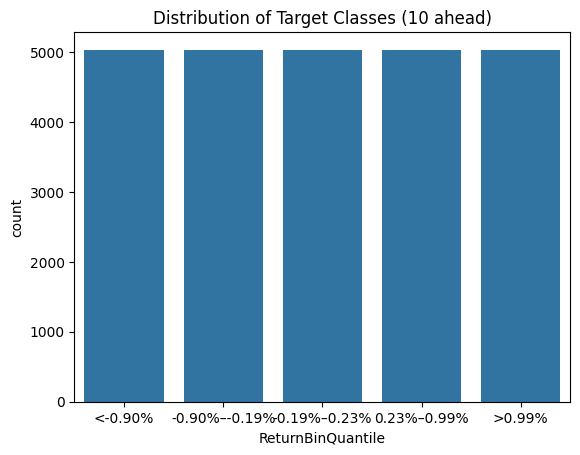

ReturnBinQuantile
<-0.90%          5033
-0.90%–-0.19%    5032
-0.19%–0.23%     5032
0.23%–0.99%      5032
>0.99%           5032
Name: count, dtype: int64


In [5]:
returns = df["Return_next_10"].dropna()

q20, q40, q60, q80 = np.quantile(returns, [0.2, 0.4, 0.6, 0.8])

print(q20*100, q40*100, q60*100, q80*100)

bins_pct = [-np.inf, q20, q40, q60, q80, np.inf]
labels_pct = [f"<{q20*100:.2f}%", 
              f"{q20*100:.2f}%–{q40*100:.2f}%", 
              f"{q40*100:.2f}%–{q60*100:.2f}%", 
              f"{q60*100:.2f}%–{q80*100:.2f}%", 
              f">{q80*100:.2f}%"]

df["ReturnBinQuantile"] = pd.cut(df["Return_next_10"], bins=bins_pct, labels=labels_pct)


sns.countplot(x=df['ReturnBinQuantile'])  # or y_train if you already split
plt.title("Distribution of Target Classes (10 ahead)")
plt.show()

print(df['ReturnBinQuantile'].value_counts())

df["ReturnBinQuantile"] = pd.cut(df["Return_next_10"], bins=bins_pct, labels=[0, 1, 2, 3, 4])


# Manual rebalance

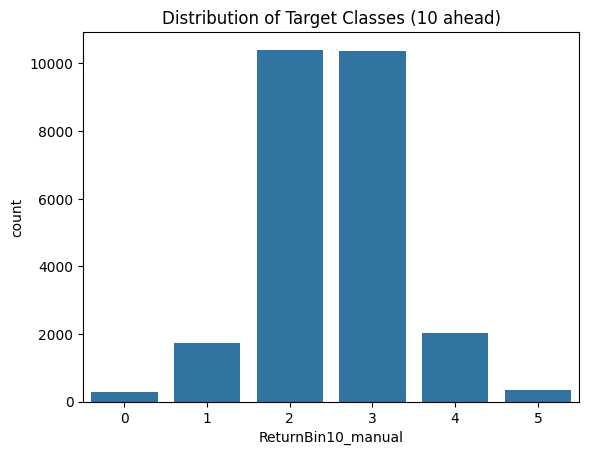

ReturnBin10_manual
2    10411
3    10357
4     2029
1     1738
5      339
0      287
Name: count, dtype: int64


In [6]:
df["ReturnBin10_manual"] = pd.cut(
    df["Return_next_10"],
    bins=[-np.inf, -0.05, -0.02, 0.00, 0.02, 0.05, np.inf],
    labels=[0, 1, 2, 3, 4, 5]
).astype(int)


sns.countplot(x=df['ReturnBin10_manual'])
plt.title("Distribution of Target Classes (10 ahead)")
plt.show()

print(df['ReturnBin10_manual'].value_counts())


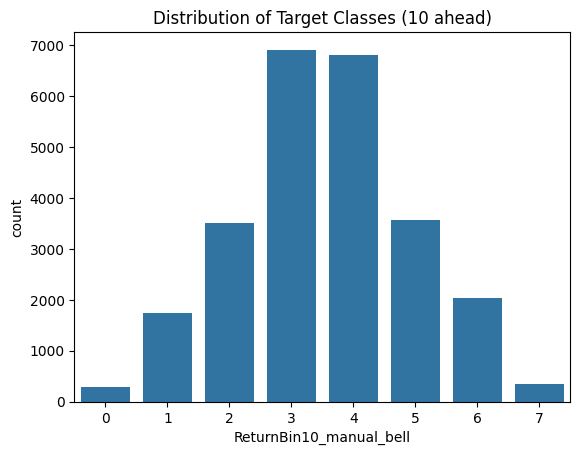

ReturnBin10_manual_bell
3    6910
4    6796
5    3561
2    3501
6    2029
1    1738
7     339
0     287
Name: count, dtype: int64


In [7]:
df["ReturnBin10_manual_bell"] = pd.cut(
    df["Return_next_10"],
    bins=[-np.inf, -0.05, -0.02, -0.008, 0.00, 0.008, 0.02, 0.05, np.inf],
    labels=[0, 1, 2, 3, 4, 5, 6, 7]
).astype(int)


sns.countplot(x=df['ReturnBin10_manual_bell'])
plt.title("Distribution of Target Classes (10 ahead)")
plt.show()

print(df['ReturnBin10_manual_bell'].value_counts())


In [8]:
df.drop(columns=['Return', 'ReturnBin']).to_csv(os.path.join("eDo", 'data', 'processed_with_targets.csv'), index=False) 